In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(font_scale = 1.05, palette="tab10", style="white")

In [2]:
df_0 = pd.read_csv("0_baseline_LSTM/exp_reach_metrics.csv", dtype={"site_id": str})
df_1 = pd.read_csv("1_metab_multitask/exp_reach_metrics.csv", dtype={"site_id": str})
df_1a = pd.read_csv("1a_multitask_do_gpp_er/exp_reach_metrics.csv", dtype={"site_id": str})
df_2 = pd.read_csv("2_multitask_dense/exp_reach_metrics.csv", dtype={"site_id": str})

In [3]:
df_0["exp"] = "0"
df_1a["exp"] = "1a"
df_1["exp"] = "1"
df_2["exp"] = "2"


In [4]:
df_comb = pd.concat([df_0, df_1, df_1a, df_2])

In [5]:
val_sites = ["01472104", "01473500", "01481500"]

In [6]:
df_comb['site_type'] = np.where(df_comb['site_id'].isin(val_sites), 'val', 'train')

In [7]:
df_comb_val = df_comb.query("partition == 'val'").dropna()
df_comb_val = df_comb_val[df_comb_val['variable'].str.startswith('do')]

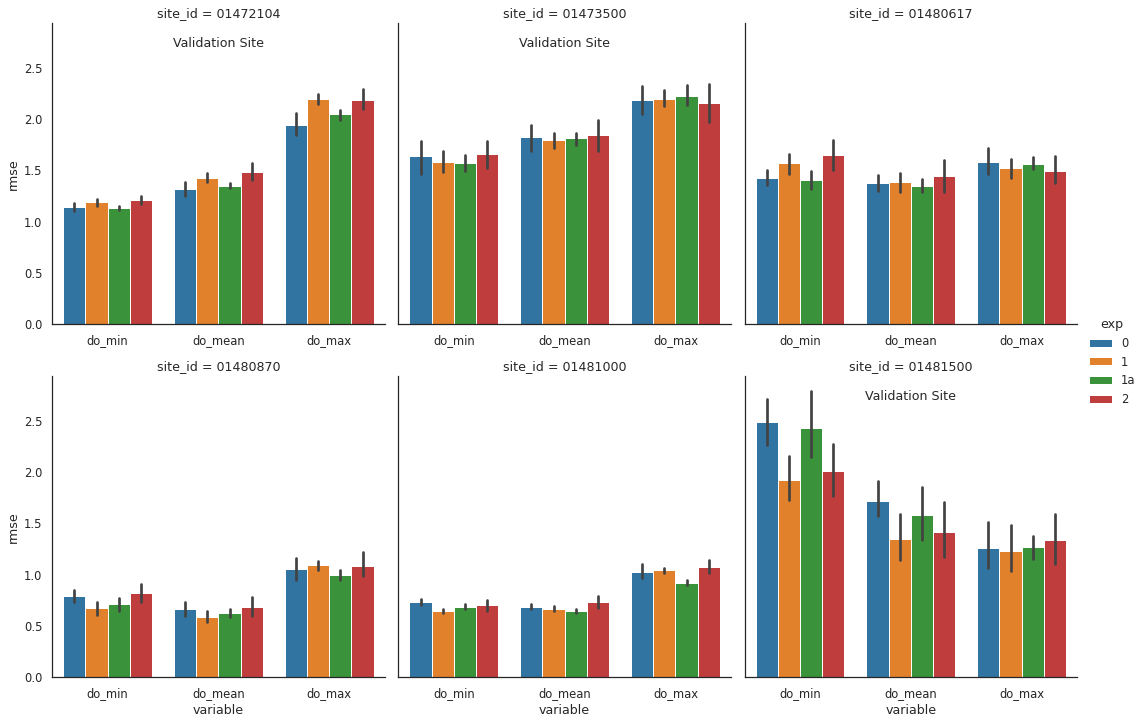

In [8]:
ct = sns.catplot(x="variable", y="rmse", hue="exp", col="site_id", 
                 data=df_comb_val, kind='bar',
                 sharex=False, col_wrap=3)
for ax_id, ax in ct.axes_dict.items():
    if ax_id in val_sites:
        ax.text(1, 2.7, "Validation Site", ha='center')
        
ct.savefig("results_w_2.png")

In [9]:
df_0 = pd.read_csv("archive/0_baseline_LSTM/exp_reach_metrics.csv", dtype={"site_id": str})
df_1 = pd.read_csv("archive/2_metab_multitask/exp_reach_metrics.csv", dtype={"site_id": str})
df_1a = pd.read_csv("archive/2a_multitask_do_gpp_er/exp_reach_metrics.csv", dtype={"site_id": str})

In [10]:
df_0["exp"] = "0"
df_1a["exp"] = "2a"
df_1["exp"] = "2"

In [11]:
df_comb = pd.concat([df_0, df_1, df_1a])

In [12]:
val_sites = ["01472104", "01473500", "01481500"]

In [13]:
df_comb['site_type'] = np.where(df_comb['site_id'].isin(val_sites), 'val', 'train')

In [21]:
df_comb_val_old = df_comb.query("partition == 'val'").dropna()
df_comb_val_old = df_comb_val_old[df_comb_val_old['variable'].str.startswith('do')]

In [31]:
df_comb_val_old['leaked_val_sites'] = 'Yes'
df_comb_val['leaked_val_sites'] = 'No'
df_comb_both = pd.concat([df_comb_val_old, df_comb_val])

In [25]:
ct.axes_dict

{('01472104',
  False): <AxesSubplot:title={'center':'site_id = 01472104 | leaked_data = False'}, ylabel='rmse'>,
 ('01472104',
  True): <AxesSubplot:title={'center':'site_id = 01472104 | leaked_data = True'}>,
 ('01473500',
  False): <AxesSubplot:title={'center':'site_id = 01473500 | leaked_data = False'}, ylabel='rmse'>,
 ('01473500',
  True): <AxesSubplot:title={'center':'site_id = 01473500 | leaked_data = True'}>,
 ('01480617',
  False): <AxesSubplot:title={'center':'site_id = 01480617 | leaked_data = False'}, ylabel='rmse'>,
 ('01480617',
  True): <AxesSubplot:title={'center':'site_id = 01480617 | leaked_data = True'}>,
 ('01480870',
  False): <AxesSubplot:title={'center':'site_id = 01480870 | leaked_data = False'}, ylabel='rmse'>,
 ('01480870',
  True): <AxesSubplot:title={'center':'site_id = 01480870 | leaked_data = True'}>,
 ('01481000',
  False): <AxesSubplot:title={'center':'site_id = 01481000 | leaked_data = False'}, ylabel='rmse'>,
 ('01481000',
  True): <AxesSubplot:title=

In [38]:
list(df_comb.site_id.unique())

['01466500',
 '01472119',
 '01473499',
 '01473675',
 '01473780',
 '01474500',
 '01480617',
 '01480870',
 '01481000',
 '01481500',
 '01472104',
 '01473500']

In [46]:
ax_id

('01481000', 'No')

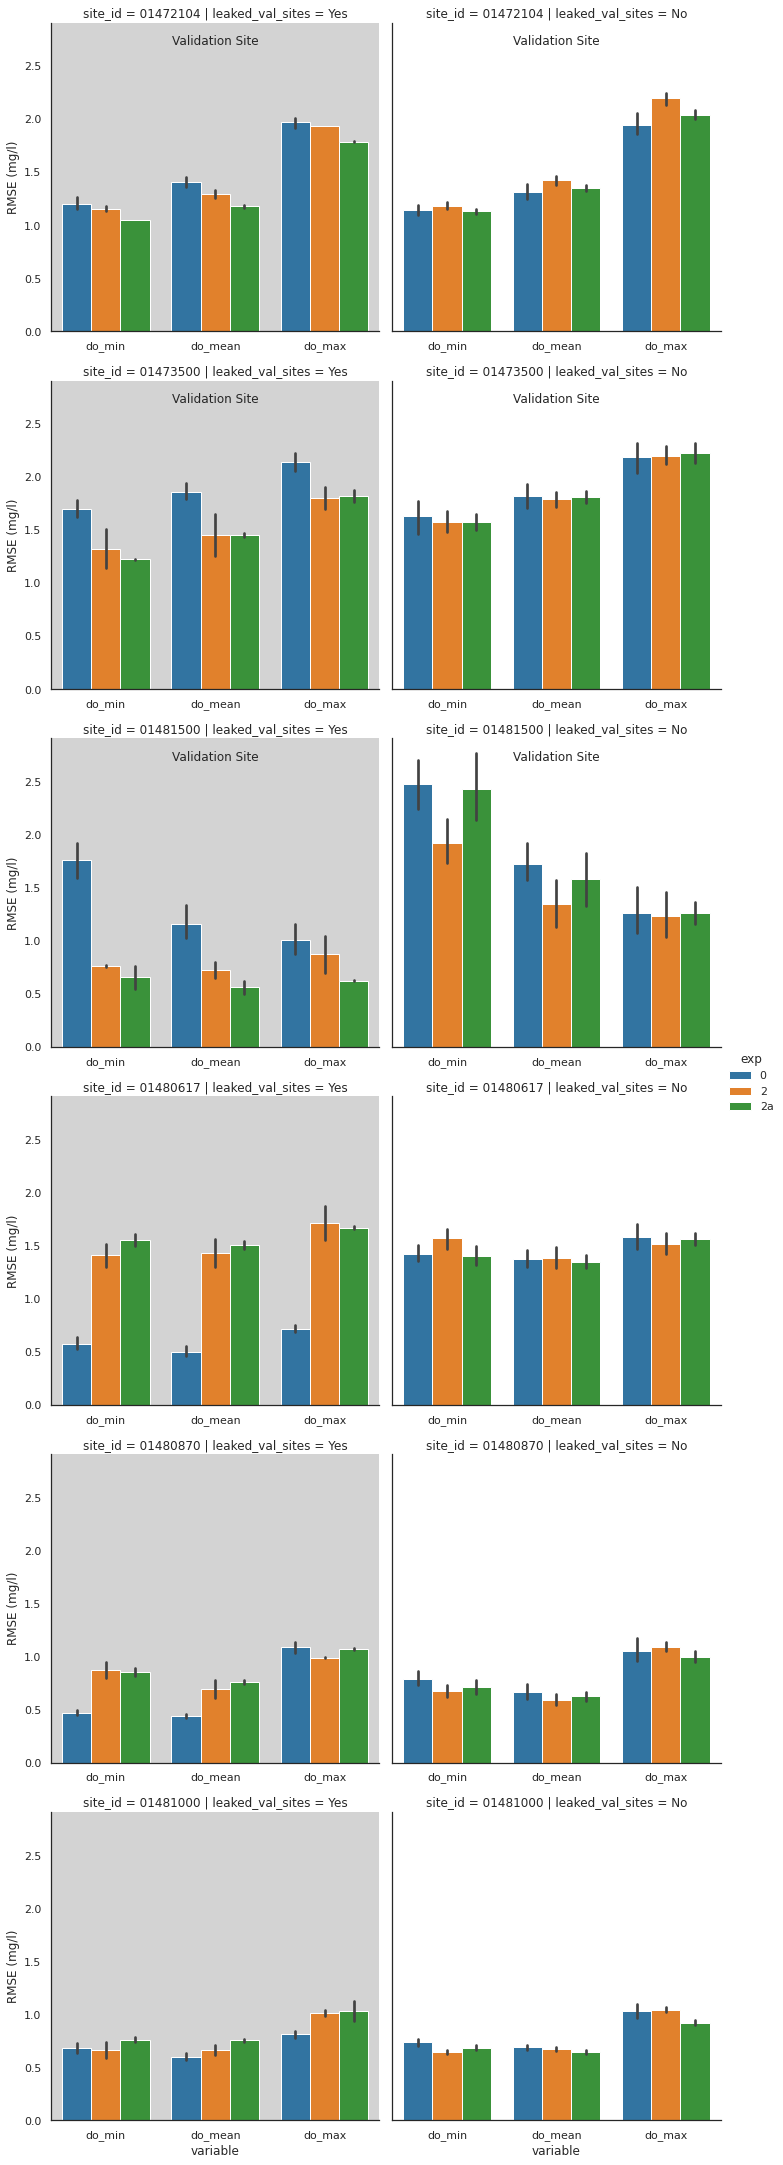

In [49]:
ct = sns.catplot(x="variable", y="rmse", hue="exp", col="leaked_val_sites", row="site_id", 
                 data=df_comb_both, kind='bar', col_order=['Yes', 'No'], 
                 row_order=['01472104',  '01473500', '01481500', '01480617', '01480870',  '01481000'],
                 sharex=False)

for ax_id, ax in ct.axes_dict.items():
    if ax_id[0] in val_sites:
        ax.text(1, 2.7, "Validation Site", ha='center')
    if ax_id[1] == 'Yes':
        ax.set_facecolor("lightgray")
ct.set_ylabels('RMSE (mg/l)')
ct.savefig("leaked_data_comparison.png", dpi=300)